In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from PIL import Image

### Load Video

In [2]:
fileName='FBC3_Zoom_right2021-05-05T18_29_16.avi'  # change the file name if needed
cap = cv2.VideoCapture(fileName)  # load the video
ret, frame = cap.read() # Read the frame

### Checking framespersec in video (30.5fps)

In [6]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(length)

22490


Because the video length is 12.29mins (i.e. 737.4 seconds)
Thus framepersec = 22490/737.4 = 30.5fps

### Get Video Frame Timestamp

In [14]:
import pandas as pd 
import numpy as np
frames_right = pd.read_csvv mc("FBC4_frames_right.csv",header= None)

In [30]:
frame = frames_right[0].tolist()
print(frame)

[4731, 13235, 15559]


### Get Specific Video Frame

In [530]:
frame_no = frame[0]  #from first index

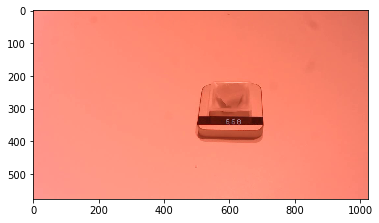

In [531]:
cap.set(1,frame_no);  #showing frame number 100
success = cap.grab()
ret, image = cap.retrieve()
plt.imshow(image)

### Image Pre-processing

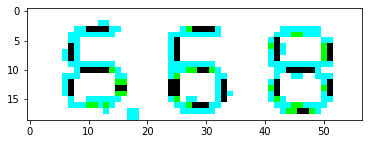

In [532]:
#Thresholding
ret,thresh1 = cv2.threshold(image,124,258,cv2.ADAPTIVE_THRESH_GAUSSIAN_C) 
#ret,thresh1 = cv2.threshold(image,124,258,cv2.ADAPTIVE_THRESH_MEAN_C) 
                             


#Cropping
resized_image = thresh1[330:349, 583:640]
plt.imshow(resized_image,'gray')

### OCR Part

In [105]:
pytesseract.pytesseract.tesseract_cmd = ('/usr/local/Cellar/tesseract/4.1.1/bin/tesseract') # this should be done only once 

In [539]:
string = pytesseract.image_to_string(resized_image, config= '--psm 11 digits')

In [540]:
print(string)

568

